In [1]:
pip install pandas seaborn matplotlib statsmodels patsy

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Load necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices

In [9]:
# Load the data
file_path = "C:/Users/nihar/OneDrive/Desktop/Bootcamp/SCMA 632/DataSet/pizza_data.csv"
pizza_data = pd.read_csv(file_path)

In [11]:
# Convert columns to category (equivalent to factors in R)
factor_columns = ['brand', 'price', 'weight', 'crust', 'cheese', 'size', 'toppings', 'spicy']
for column in factor_columns:
    pizza_data[column] = pizza_data[column].astype('category')

In [13]:

# Create profiles
profiles = pizza_data.drop(columns=['ranking'])

In [15]:
# Create preferences dataset
preferences = pd.DataFrame({
    'Respondent': pizza_data.index.repeat(len(profiles)),
    'Profile': pd.Series(range(len(profiles))).repeat(len(pizza_data)),
    'Rating': pizza_data['ranking'].repeat(len(profiles))
})


In [17]:
# Merge profiles with preferences
conjoint_data = preferences.merge(profiles, left_on='Profile', right_index=True)

In [19]:

# Perform conjoint analysis using OLS (equivalent to lm in R)
formula = 'Rating ~ ' + ' + '.join(factor_columns)
y, X = dmatrices(formula, data=conjoint_data, return_type='dataframe')
conjoint_model = sm.OLS(y, X).fit()

In [21]:
# Summary of results
print(conjoint_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.339e+04
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:13:16   Log-Likelihood:                 169.09
No. Observations:                 256   AIC:                            -308.2
Df Residuals:                     241   BIC:                            -255.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               17.3750 

In [23]:
# Extract part-worth utilities
part_worths = conjoint_model.params
part_worths_df = part_worths.reset_index()
part_worths_df.columns = ['Attribute', 'PartWorth']

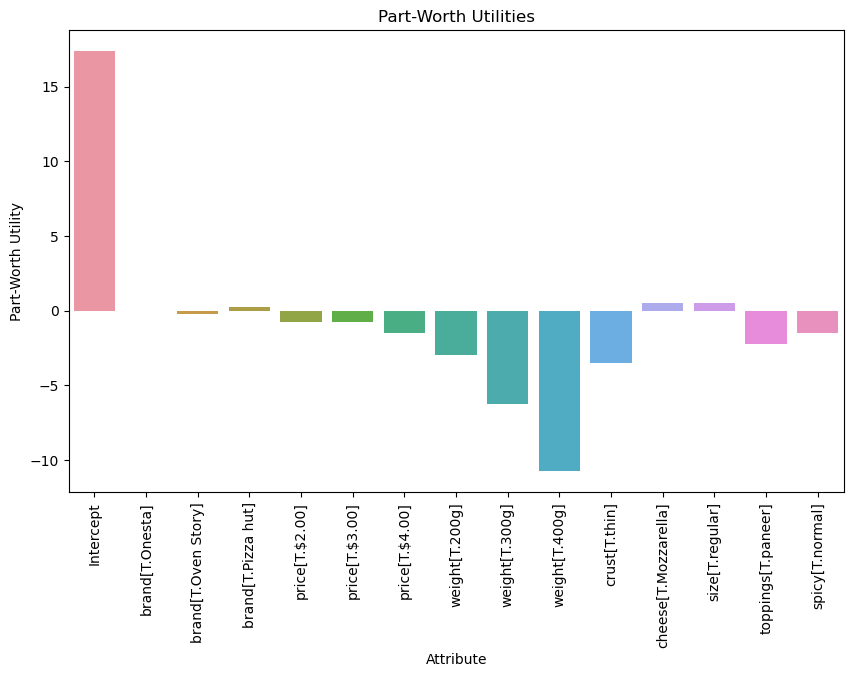

In [25]:
# Plot part-worth utilities
plt.figure(figsize=(10, 6))
sns.barplot(x='Attribute', y='PartWorth', data=part_worths_df)
plt.title("Part-Worth Utilities")
plt.xlabel("Attribute")
plt.ylabel("Part-Worth Utility")
plt.xticks(rotation=90)
plt.show()

In [27]:
# Compute importance
importance = part_worths.drop('Intercept').abs() / part_worths.drop('Intercept').abs().sum() * 100
importance_df = importance.reset_index()
importance_df.columns = ['Attribute', 'Importance']

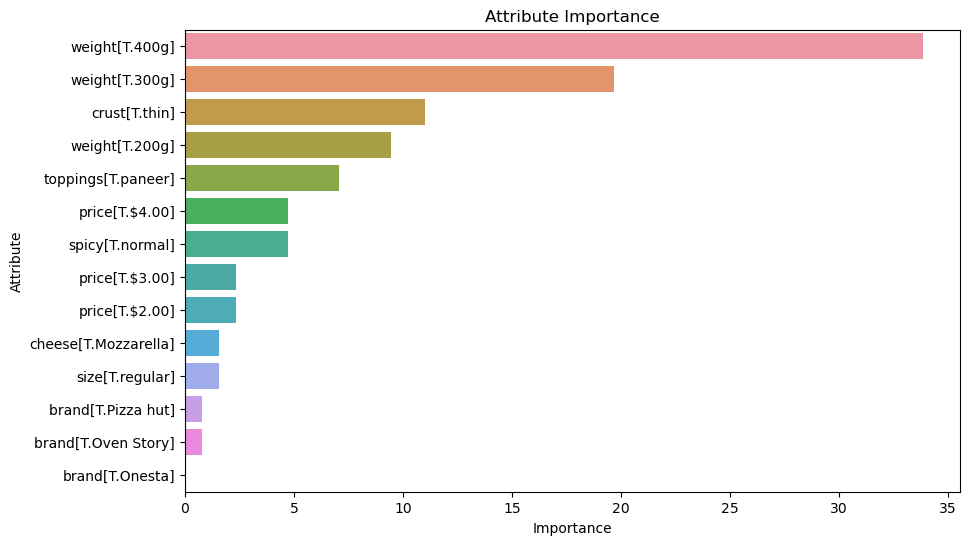

In [29]:
# Plot attribute importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Attribute', data=importance_df.sort_values('Importance', ascending=False))
plt.title("Attribute Importance")
plt.xlabel("Importance")
plt.ylabel("Attribute")
plt.show()


In [31]:
# Create boxplots for each attribute
attributes = ['brand', 'price', 'weight', 'crust', 'cheese', 'size', 'toppings', 'spicy']


In [33]:

# Function to create a boxplot for an attribute
def create_boxplot(attribute):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=attribute, y='ranking', data=pizza_data)
    plt.title(f"Distribution of Rankings by {attribute.capitalize()}")
    plt.xlabel(attribute.capitalize())
    plt.ylabel("Ranking")
    plt.show()

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


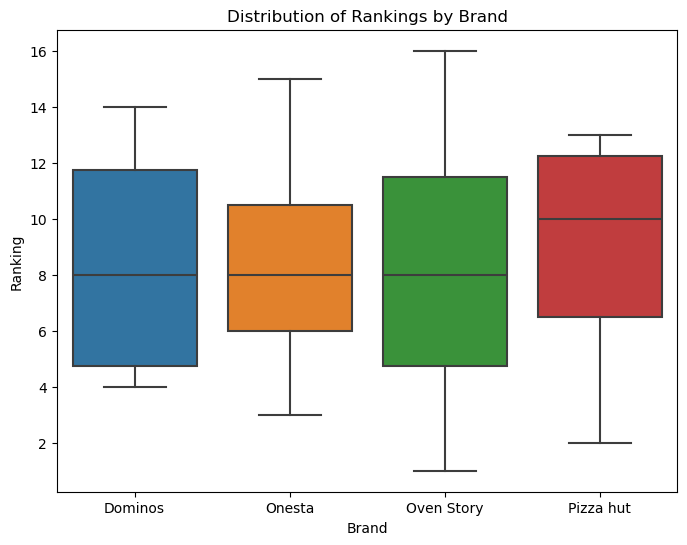

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


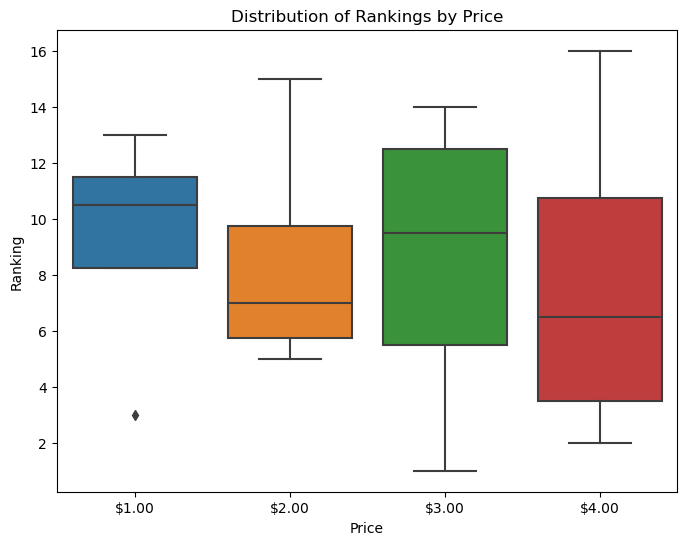

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


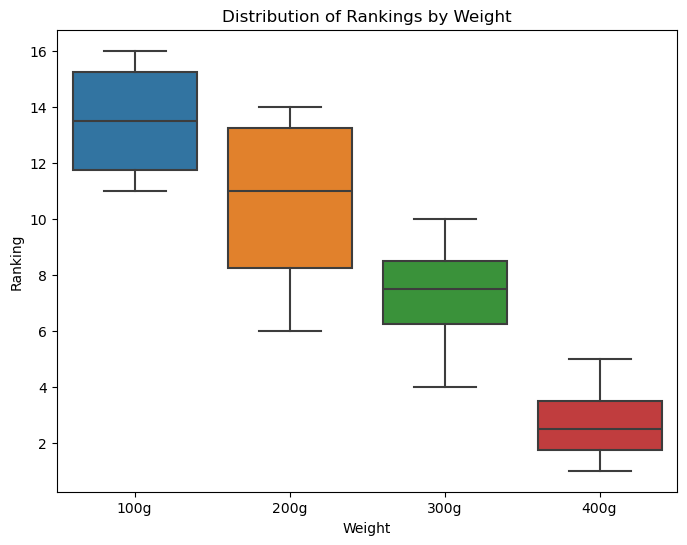

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


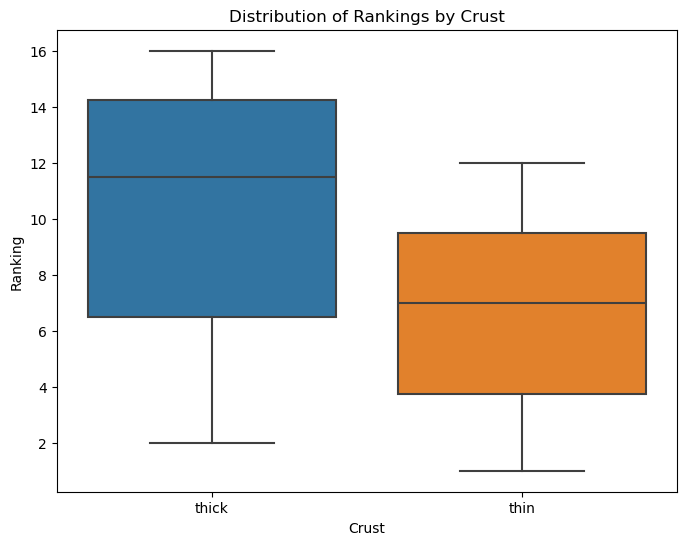

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


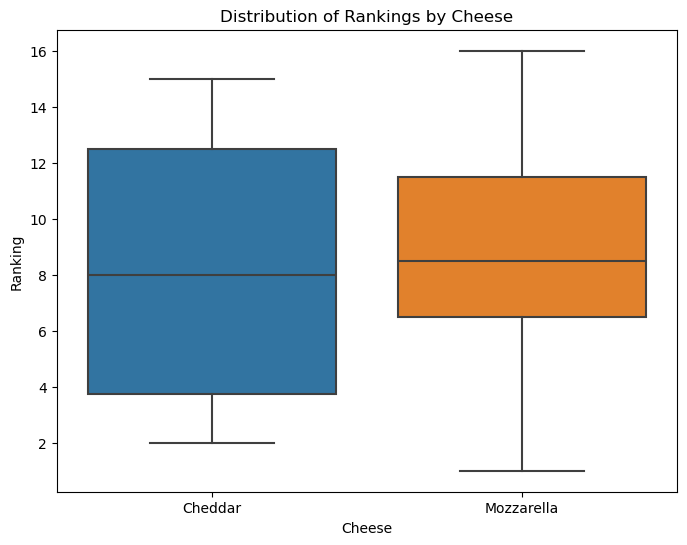

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


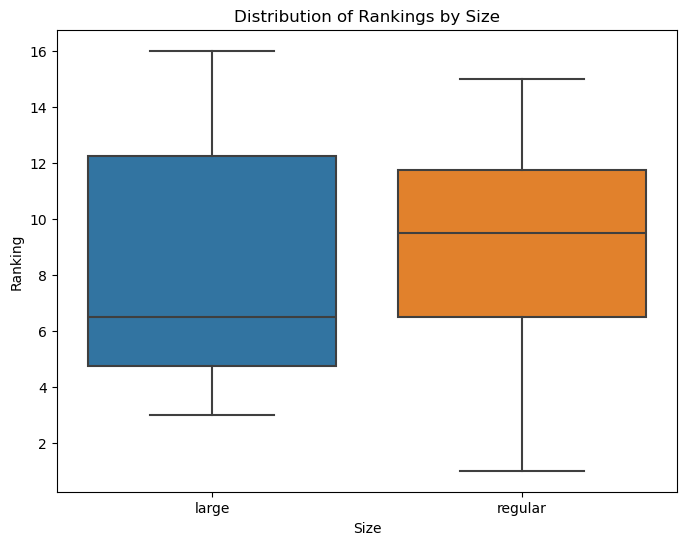

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


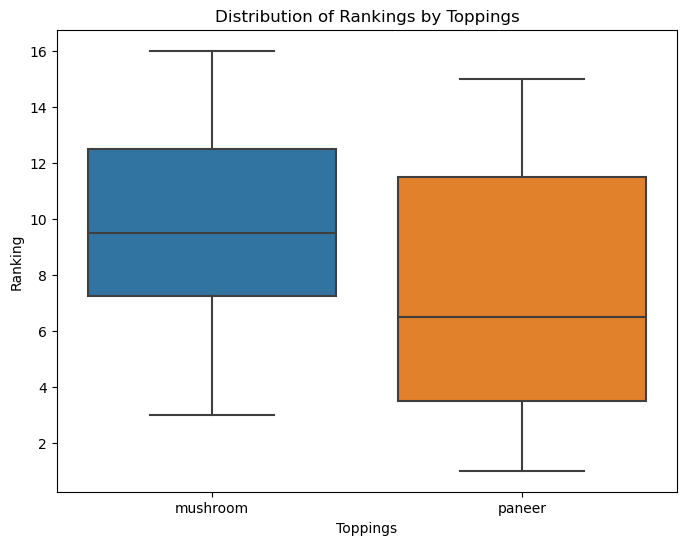

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


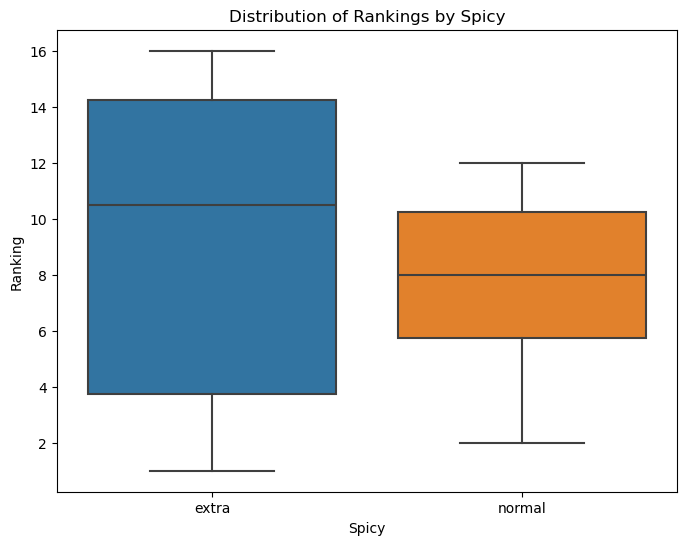

In [35]:
# Generate boxplots for all attributes
for attribute in attributes:
    create_boxplot(attribute)